# <span style="color:green"> ESERCITAZIONE 10 </span>
## <span style="color:blue">  The travelling salesman problem </span>

### Esercizio 10.1

Scegliere **SOLO UNA** delle due seguenti possibilità:

---

#### 1. Parallelizzazione con librerie MPI dell’Algoritmo Genetico

Parallelizza il tuo codice dell’**Algoritmo Genetico (GA)** per risolvere il **Problema del Commesso Viaggiatore (TSP)** eseguendo una *ricerca genetica* con (fino a) **11 ricerche GA parallele del cammino ottimale**:

- Ogni nodo deve eseguire una ricerca GA indipendente, la cosiddetta *Continente*,
- **Ma** ogni $N_{migr}$ generazioni, i *Continenti* devono **scambiarsi casualmente i migliori individui**.

---

#### 2. Parallel Tempering (Simulated Annealing con più temperature)

A partire dal tuo codice dell’Algoritmo Genetico, implementa un algoritmo di **Parallel Tempering**:

- Parallelizza con le librerie MPI il tuo algoritmo per risolvere il TSP,
- Ogni nodo di calcolo (fino a 11) è caratterizzato da una **temperatura diversa** (o da un insieme limitato di temperature se ne servono più di 11),
- Utilizza i tuoi **operatori genetici (eccetto il crossover)** come **mosse di prova per l’algoritmo di Metropolis**,
- **Aggiungi una mossa di prova** che propone uno **scambio di cammini tra temperature (nodi) adiacenti** (vedi lezione 8 per la formula di accettazione),
- La **soluzione candidata al TSP** apparirà sul **nodo con la temperatura più bassa**.


Tra i due esercizi proposti è stato svolto il primo. Si ha aggiunto una funzione di scambio dei cammini tra i vari "continenti" (i core utilizzati) che ricercano il cammino migliore. Questa funzione ogni 12 generazioni ripartisce i 5 migliori cammini di ogni "continente" in maniera casuale tra essi.

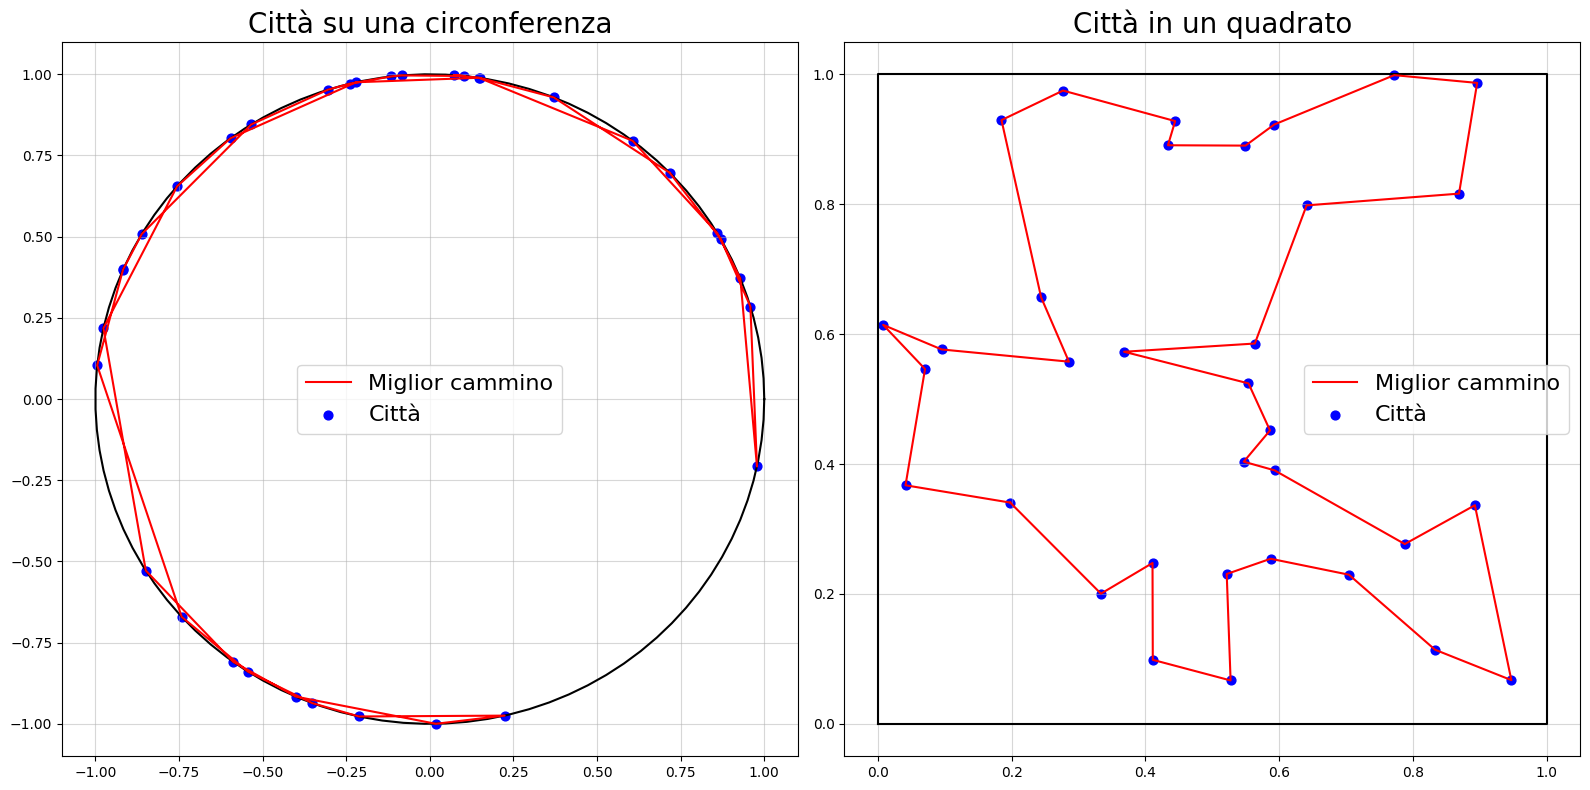

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
coordinates_circle = np.loadtxt('10.1/cities_positions_circ.out')
indices_circle = np.loadtxt('10.1/best_path_circ.out', dtype=int)

coordinates_square = np.loadtxt('10.1/cities_positions_square.out')
indices_square = np.loadtxt('10.1/best_path_square.out', dtype=int)

# Reorder coordinates based on the best path
ordered_coords_circle = coordinates_circle[indices_circle]
ordered_x_circle = ordered_coords_circle[:, 0]
ordered_y_circle = ordered_coords_circle[:, 1]

ordered_coords_square = coordinates_square[indices_square]
ordered_x_square = ordered_coords_square[:, 0]
ordered_y_square = ordered_coords_square[:, 1]

# Coordinates of the cities
x_coords_circle = coordinates_circle[:, 0]
y_coords_circle = coordinates_circle[:, 1]

x_coords_square = coordinates_square[:, 0]
y_coords_square = coordinates_square[:, 1]

# Plot
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), color='k')
plt.plot(ordered_x_circle, ordered_y_circle, label='Miglior cammino', color='red')
plt.scatter(x_coords_circle, y_coords_circle, label='Città', s=40, color='blue')
plt.grid(True, alpha=0.5)
plt.legend(fontsize=16)
plt.title('Città su una circonferenza', fontsize=20)

plt.subplot(1, 2, 2)
plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color='k')
plt.plot(ordered_x_square, ordered_y_square, label='Miglior cammino', color='red')
plt.scatter(x_coords_square, y_coords_square, label='Città', s=40, color='blue')
plt.grid(True, alpha=0.5)
plt.legend(fontsize=16)
plt.title('Città in un quadrato', fontsize=20)

plt.tight_layout()
plt.show()



### Esercizio 10.2

Applica il tuo codice parallelo al problema del TSP utilizzando le **coordinate di longitudine e latitudine dei 110 capoluoghi di provincia italiani** contenute nel file *cap_prov_ita.dat*.

- Se nell'Esercizio 10.1 hai scelto l’opzione **1**, ottieni un **miglioramento rispetto all’uso dello stesso numero di core di calcolo ma con ricerche GA indipendenti**?

- Se nell'Esercizio 10.1 hai scelto l’opzione **2**, utilizzando un numero di temperature **uguale al numero di individui del tuo codice GA non parallelo**, ottieni un **miglioramento rispetto a quest’ultimo**?


In questo caso si sono utilizzati 100 scambi ogni 100 generazioni con 8 core. Si nota come, a parità di generazioni e core, la precisione della soluzione al problema migliori proporzionalmente al numero di scambi. A dimosttrazione di ciò sono stati riportati 4 grafici rappresentanti la soluzione al problema per numero crescente di scambi 

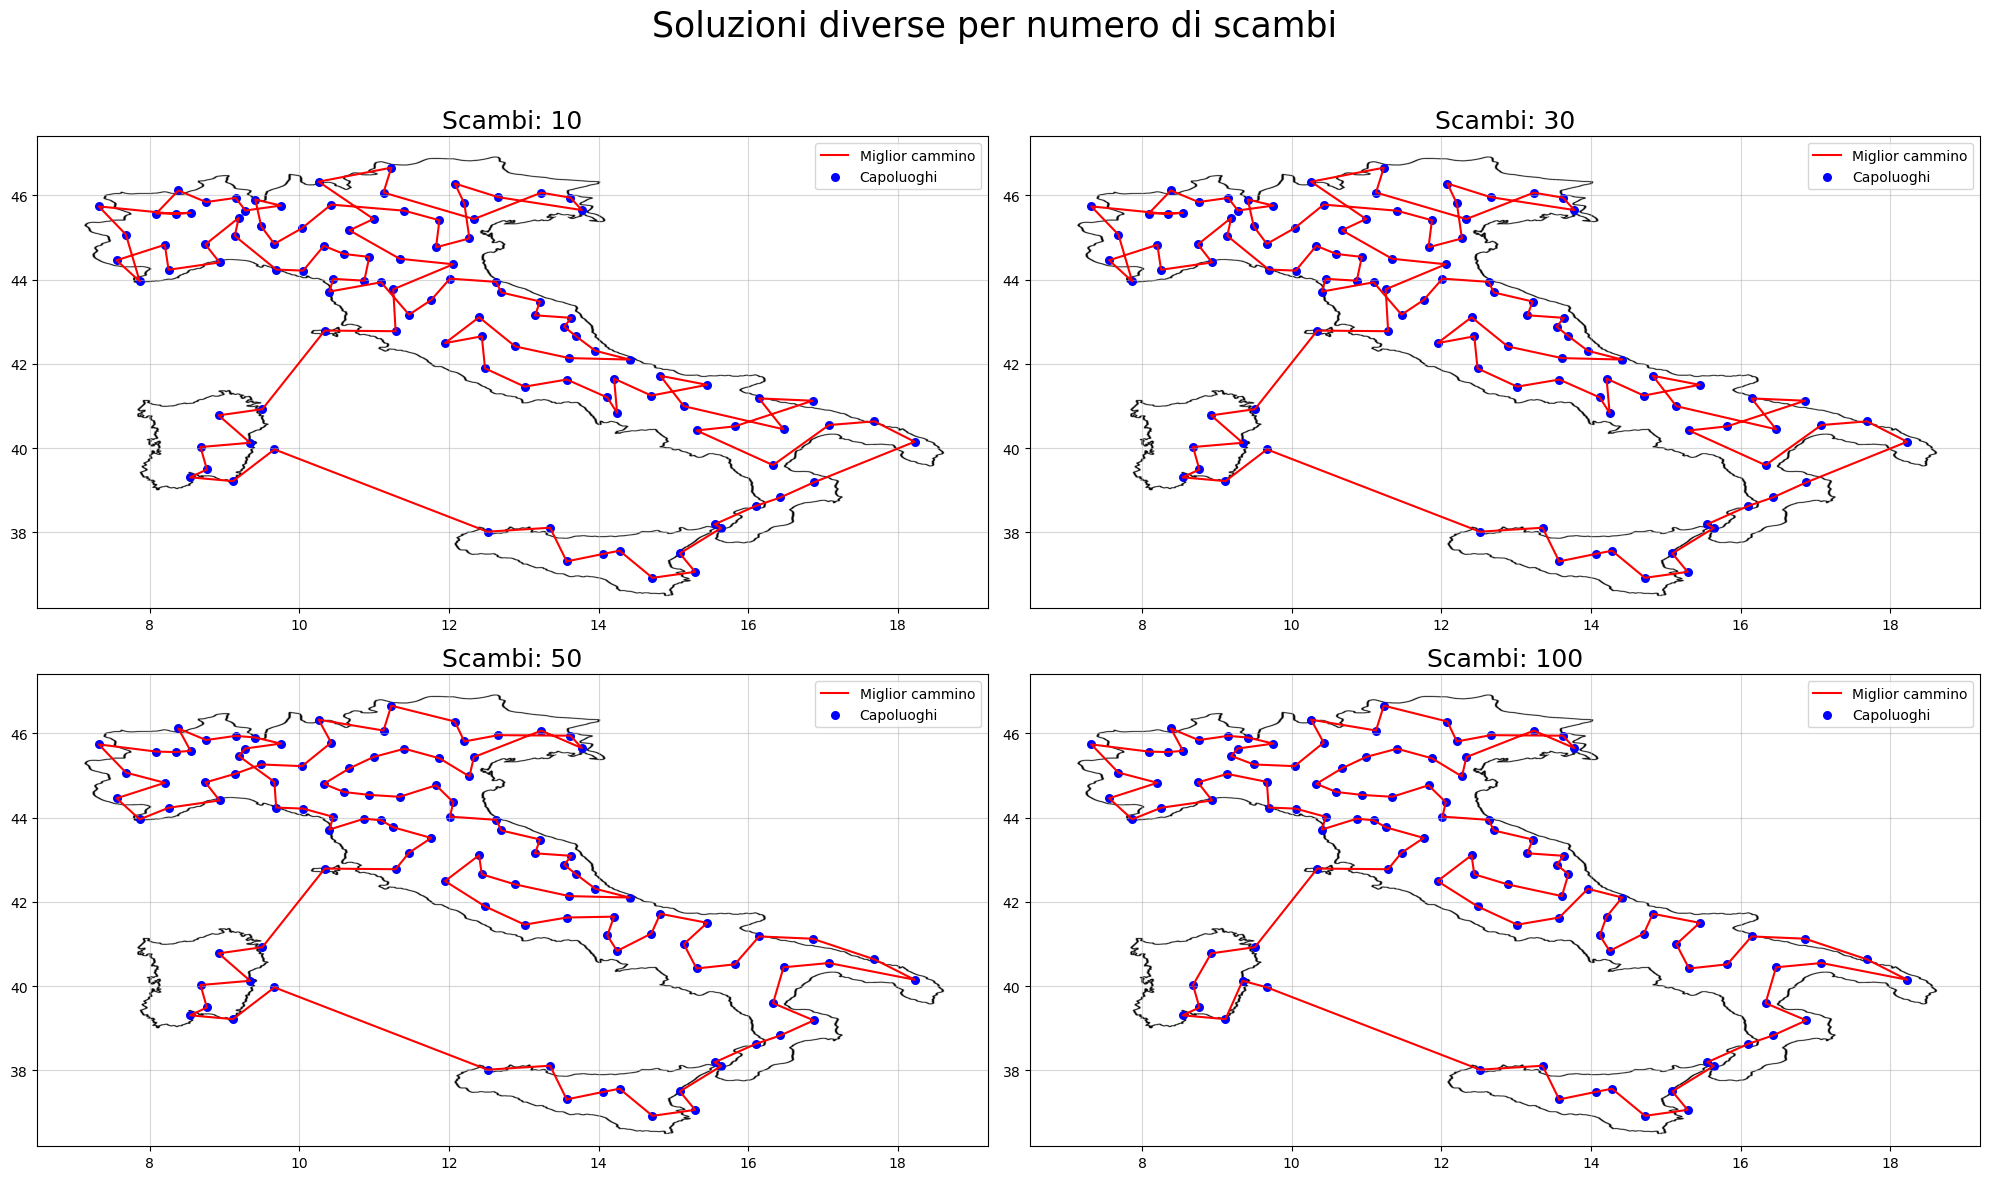

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carica coordinate dei capoluoghi
coordinates_ita = np.loadtxt('10.2/cap_prov_ita.dat')
x_coords_ita, y_coords_ita = zip(*coordinates_ita)

# Lista dei file da plottare
file_paths = [
    ('10.2/best_path_10.out', 'Scambi: 10'),
    ('10.2/best_path_30.out', 'Scambi: 30'),
    ('10.2/best_path_50.out', 'Scambi: 50'),
    ('10.2/best_path_100.out', 'Scambi: 100')
]

# Carica immagine della cartina
img = mpimg.imread('10.2/cartina_Italia.png')

# Crea 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
plt.suptitle("Soluzioni diverse per numero di scambi", fontsize=25)

# Per ogni file, crea il plot
for ax, (file_path, title) in zip(axes.flat, file_paths):
    with open(file_path, 'r') as file:
        indices = [int(line.strip()) for line in file]
    ordered_x = [x_coords_ita[i] for i in indices]
    ordered_y = [y_coords_ita[i] for i in indices]

    ax.imshow(img, extent=[6.5, 19.2, 36.2, 47.4], aspect='auto')
    ax.plot(ordered_x, ordered_y, label='Miglior cammino', color='red')
    ax.scatter(x_coords_ita, y_coords_ita, label='Capoluoghi', s=30, color='blue')
    ax.set_title(title, fontsize=18)
    ax.grid(True, alpha=0.5)
    ax.legend(fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()